<a href="https://colab.research.google.com/github/rmtu14/ATM-/blob/main/Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Scale the data by dividing by 255.0
x_train_scaled = x_train / 255.0
x_test_scaled = x_test / 255.0

# If you want to use a validation set, you can split the training data
x_train_scaled, x_val_scaled, y_train, y_val = train_test_split(x_train_scaled, y_train, test_size=0.1, random_state=42)

# Print the shapes of the datasets
print("Shape of x_train_scaled:", x_train_scaled.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_val_scaled:", x_val_scaled.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of x_test_scaled:", x_test_scaled.shape)
print("Shape of y_test:", y_test.shape)


11490434/11490434 [==============================] - 1s 0us/step
Shape of x_train_scaled: (54000, 28, 28)
Shape of y_train: (54000,)
Shape of x_val_scaled: (6000, 28, 28)
Shape of y_val: (6000,)
Shape of x_test_scaled: (10000, 28, 28)
Shape of y_test: (10000,)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

# Create a Sequential model
model = Sequential()

# Add Flatten layer with input shape 28x28
model.add(Flatten(input_shape=(28, 28)))

# Add Dense layer with 128 units and ReLU activation
model.add(Dense(128, activation='relu'))

# Add Dropout layer
model.add(Dropout(0.5))  # Adjust the dropout rate as needed

# Add Dense layer with the number of classes as units and softmax activation
# Assuming there are 10 classes for MNIST
model.add(Dense(10, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
from tensorflow.keras.optimizers import SGD

# Set the learning rate (choose a value based on your preferences)
learning_rate = 0.01

# Create an instance of SGD optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the selected optimizer and appropriate loss
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the compiled model
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [4]:
# Assuming x_train_scaled, y_train are your training data and labels
# Assuming x_val_scaled, y_val are your validation data and labels

# Fit the model for 10 epochs and store the training history
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

# Print the training history
print(history.history)


Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.8841 - accuracy: 0.7334 - val_loss: 0.4227 - val_accuracy: 0.8912
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.4942 - accuracy: 0.8562 - val_loss: 0.3262 - val_accuracy: 0.9147
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4119 - accuracy: 0.8809 - val_loss: 0.2798 - val_accuracy: 0.9247
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3675 - accuracy: 0.8943 - val_loss: 0.2518 - val_accuracy: 0.9313
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3379 - accuracy: 0.9044 - val_loss: 0.2284 - val_accuracy: 0.9392
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3102 - accuracy: 0.9117 - val_loss: 0.2122 - val_accuracy: 0.9435
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2928 - accuracy: 0.9158 - val_loss: 0.1990 - val_accuracy:

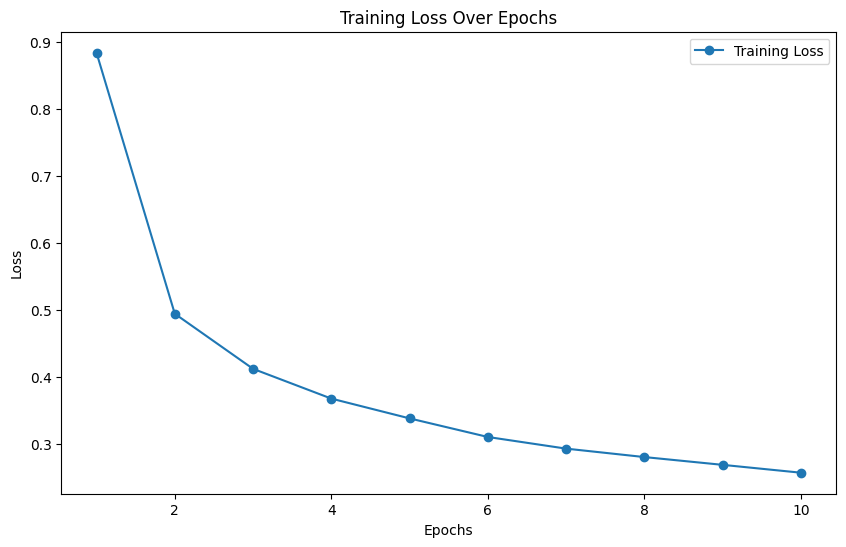

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

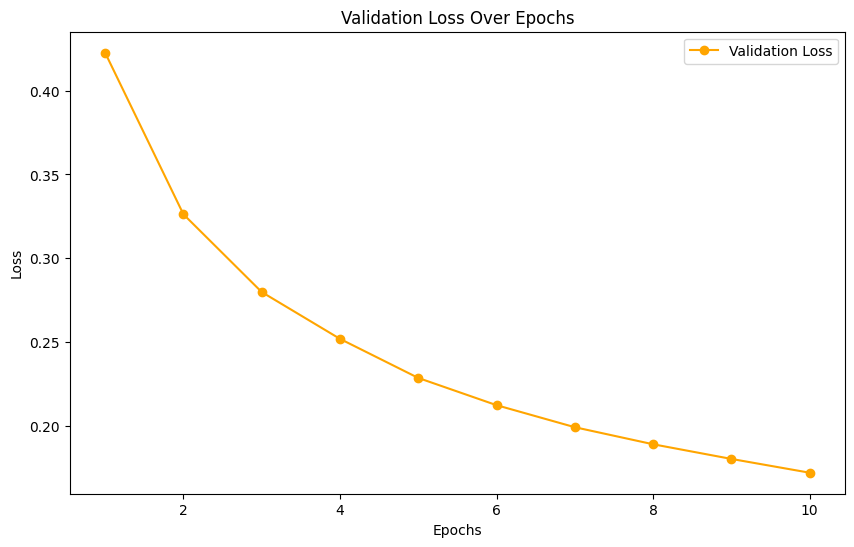

In [5]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the history

# Extract training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of the number of epochs done while training
epochs = range(1, len(training_loss) + 1)

# Plot line plot of Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot line plot of Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt


In [6]:
from tensorflow.keras.optimizers import SGD

# Set the learning rate (choose a value based on your preferences)
learning_rate = 0.01

# Create an instance of SGD optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the selected optimizer and appropriate loss
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the compiled model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Assuming x_train_scaled, y_train are your training data and labels
# Assuming x_val_scaled, y_val are your validation data and labels

# Fit the model for 10 epochs and store the training history
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

# Print the training history
print(history.history)


Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2489 - accuracy: 0.9291 - val_loss: 0.1647 - val_accuracy: 0.9535
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2398 - accuracy: 0.9319 - val_loss: 0.1601 - val_accuracy: 0.9550
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9334 - val_loss: 0.1536 - val_accuracy: 0.9550
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2252 - accuracy: 0.9355 - val_loss: 0.1500 - val_accuracy: 0.9570
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2175 - accuracy: 0.9373 - val_loss: 0.1464 - val_accuracy: 0.9577
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2166 - accuracy: 0.9384 - val_loss: 0.1419 - val_accuracy: 0.9580
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.2111 - accuracy: 0.9401 - val_loss: 0.1380 - val_accuracy:

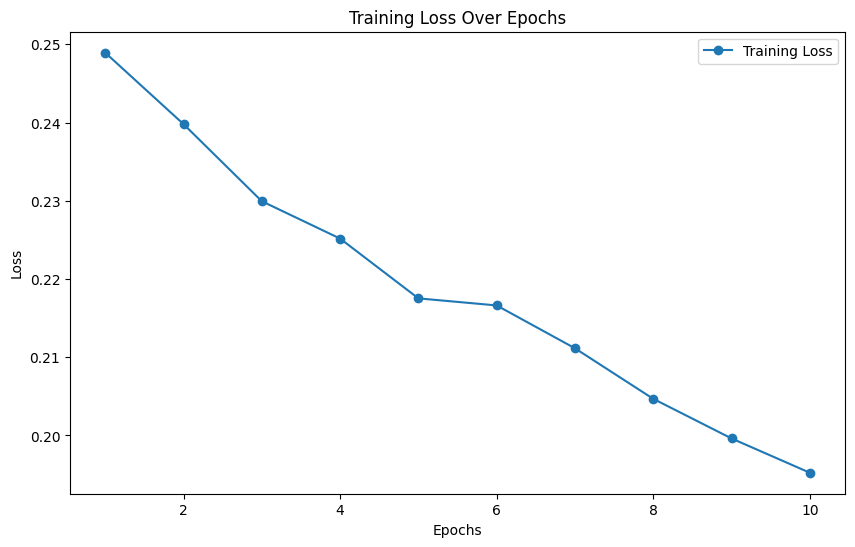

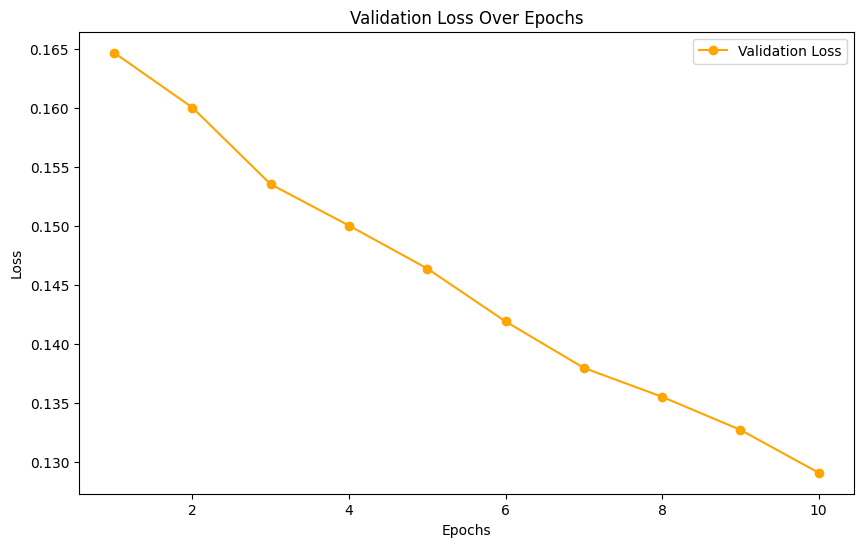

In [8]:
import matplotlib.pyplot as plt

# Extract training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of the number of epochs done while training
epochs = range(1, len(training_loss) + 1)

# Plot line plot of Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot line plot of Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
from tensorflow.keras.optimizers import Adadelta

# Set the learning rate (choose a value based on your preferences)
learning_rate = 1.0  # You can adjust this value

# Create an instance of Adadelta optimizer with the specified learning rate
optimizer = Adadelta(learning_rate=learning_rate)

# Compile the model with the selected optimizer and appropriate loss
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the compiled model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Assuming x_train_scaled, y_train are your training data and labels
# Assuming x_val_scaled, y_val are your validation data and labels

# Fit the model for 10 epochs and store the training history
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

# Print the training history
print(history.history)


Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2045 - accuracy: 0.9393 - val_loss: 0.1289 - val_accuracy: 0.9603
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1879 - accuracy: 0.9455 - val_loss: 0.1180 - val_accuracy: 0.9650
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1743 - accuracy: 0.9496 - val_loss: 0.1130 - val_accuracy: 0.9670
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1650 - accuracy: 0.9522 - val_loss: 0.1104 - val_accuracy: 0.9682
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1626 - accuracy: 0.9535 - val_loss: 0.1061 - val_accuracy: 0.9697
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1551 - accuracy: 0.9551 - val_loss: 0.1049 - val_accuracy: 0.9707
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1513 - accuracy: 0.9563 - val_loss: 0.1051 - val_accuracy:

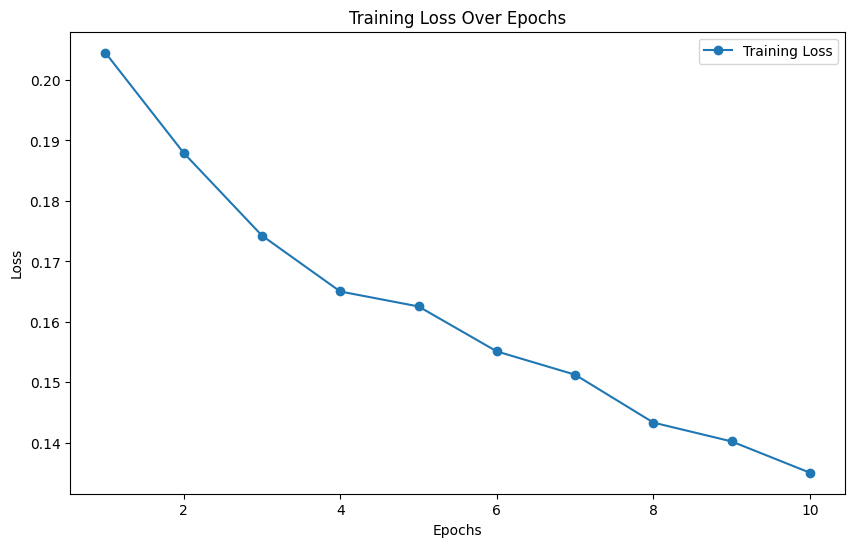

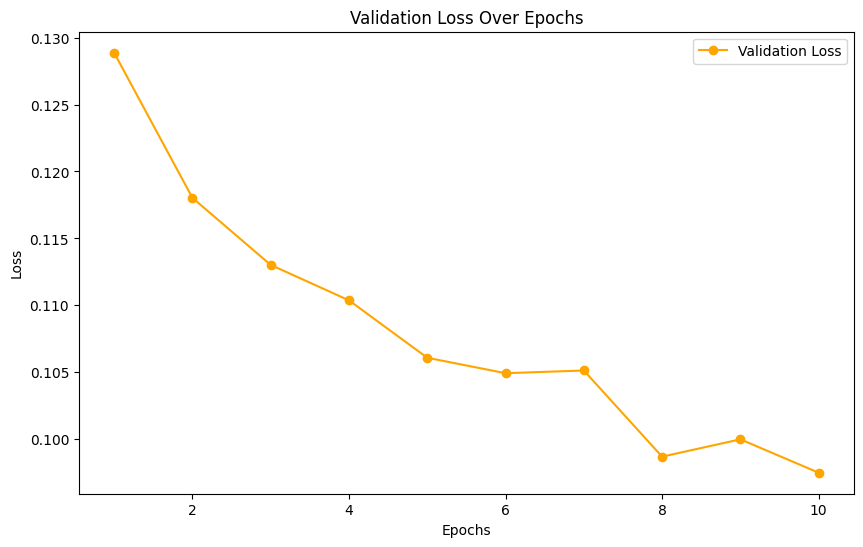

In [11]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and stored the history

# Extract training and validation losses from history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create a list of the number of epochs done while training
epochs = range(1, len(training_loss) + 1)

# Plot line plot of Training Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot line plot of Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', color='orange')
plt.title('Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [12]:
from tensorflow.keras.optimizers import Nadam

# Set the learning rate (choose a value based on your preferences)
learning_rate = 0.001  # You can adjust this value

# Create an instance of Nadam optimizer with the specified learning rate
optimizer = Nadam(learning_rate=learning_rate)

# Compile the model with the selected optimizer and appropriate loss
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the compiled model
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Assuming x_train_scaled, y_train are your training data and labels
# Assuming x_val_scaled, y_val are your validation data and labels

# Fit the model for 10 epochs and store the training history
history = model.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

# Print the training history
print(history.history)


Epoch 1/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1605 - accuracy: 0.9526 - val_loss: 0.0991 - val_accuracy: 0.9725
Epoch 2/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1529 - accuracy: 0.9555 - val_loss: 0.0974 - val_accuracy: 0.9720
Epoch 3/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1397 - accuracy: 0.9562 - val_loss: 0.0875 - val_accuracy: 0.9722
Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1321 - accuracy: 0.9597 - val_loss: 0.0874 - val_accuracy: 0.9740
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1296 - accuracy: 0.9603 - val_loss: 0.0849 - val_accuracy: 0.9745
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.1202 - accuracy: 0.9628 - val_loss: 0.0859 - val_accuracy: 0.9767
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1170 - accuracy: 0.9627 - val_loss: 0.0892 - val_accurac